In [46]:
DATA_PATH = '../../data/'
LIGHTCURVES_PATH = DATA_PATH + 'lightcurves/'

In [47]:
import pandas as pd

Load Transient Catalog

In [48]:
filename = 'transient_catalog.pickle'
indir = DATA_PATH; filepath = indir + filename
df_cat = pd.read_pickle(filepath)
df_cat = pd.read_pickle(filepath)
print(df_cat.TransientID.unique().shape)

(5539,)


In [49]:
df_cat.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


In [50]:
df_cat[df_cat.TransientID==1306151290014118570]

,Classification,TransientID
2013,HPM,1306151290014118570


Load Transient Lightcurves

In [62]:
filename = 'transient_lightcurves.pickle'
indir = LIGHTCURVES_PATH; filepath = indir + filename
df_lcs = pd.read_pickle(filepath)
df_lcs['TransientID'] = pd.to_numeric(df_lcs['TransientID'].str[6:])
print(df_lcs.TransientID.unique().shape)

(4984,)


Check that all Lightcurves TransientID's are in Catalog

In [63]:
all_exist = True
transID_cat_list = df_cat.TransientID.unique()
for lcs_id in df_lcs.TransientID.unique():
    all_exist = all_exist and (lcs_id in transID_cat_list)
print('All exist:', str(all_exist))

All exist: True


Check that all Catalog TransientID's are in Lightcurves 

In [64]:
all_exist = True
lcs_missing_transientID_list = []
transID_lcs_list = df_lcs.TransientID.unique()
for cat_id in df_cat.TransientID.unique():
    id_exists = (cat_id in transID_lcs_list)
    all_exist = all_exist and id_exists
    if not id_exists: lcs_missing_transientID_list.append(cat_id)
print('All exist:', str(all_exist))
print('Missing: {} Transients'.format(len(lcs_missing_transientID_list)))

All exist: False
Missing: 555 Transients


Merge dataframes with inner join

In [65]:
df_merge = df_cat.copy().merge(df_lcs.copy().groupby('TransientID',as_index=False).count(), how='inner')
df_merge.rename(columns={'Mag':'ObsCount'}, inplace=True)
df_merge = df_merge[['TransientID', 'Classification', 'ObsCount']]

In [66]:
print(df_merge.shape)

(4984, 3)


Top 10 count of transients by class

In [67]:
df = df_merge[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(10).transpose()

Classification,SN,CV,HPM,AGN,SN?,Blazar,Flare,Unknown,AGN?,CV?
ObjCount,1539,943,436,429,294,239,215,188,133,68


Describe transients observation count

In [68]:
df_lcs.sort_values(['MJD'])['MJD'].iloc[0]

53464.153988194696

In [69]:
df_lcs.groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,4984.000000,4984.000000,4984.000000
mean,90.584671,90.584671,90.584671
std,112.330606,112.330606,112.330606
min,1.000000,1.000000,1.000000
25%,9.000000,9.000000,9.000000
50%,35.000000,35.000000,35.000000
75%,140.000000,140.000000,140.000000
max,880.000000,880.000000,880.000000


Count number of objects with at least 5 observations

In [70]:
df_merge_filtered = df_merge[df_merge.ObsCount >= 5]
df_merge_filtered.shape[0]

4384

Top 10 count of transients by class (with at least 5 observations)

In [71]:
df = df_merge_filtered[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(20).transpose()

Classification,SN,CV,AGN,HPM,SN?,Blazar,Flare,AGN?,Unknown,CV?,Var,Ast?,SN/CV,SN/AGN,YSO,Mira,Blazar?,Flare?,Var?,Ast
ObjCount,1295,862,427,412,239,237,207,132,114,55,47,31,28,23,21,20,19,18,12,12


Describe observation count for transients with at least 5 observations

In [72]:
df_lcs[df_lcs.TransientID.isin(df_merge_filtered.TransientID)].groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,4384.000000,4384.000000,4384.000000
mean,102.623631,102.623631,102.623631
std,114.634489,114.634489,114.634489
min,5.000000,5.000000,5.000000
25%,15.000000,15.000000,15.000000
50%,48.000000,48.000000,48.000000
75%,163.250000,163.250000,163.250000
max,880.000000,880.000000,880.000000


Count number of objects with at least 5 observations

In [73]:
df_merge_filtered = df_merge[df_merge.ObsCount >= 10]
df_merge_filtered.shape[0]

3728

Top 10 count of transients by class (with at least 5 observations)

In [74]:
df = df_merge_filtered[['Classification','ObsCount']].groupby('Classification').count()
df = df.rename(columns={'ObsCount':'ObjCount'}).sort_values('ObjCount', ascending=False)
df.head(20).transpose()

Classification,SN,CV,AGN,HPM,Blazar,Flare,SN?,AGN?,Unknown,Var,CV?,YSO,Mira,Blazar?,SN/AGN,SN/CV,LPV,Flare?,SN/AGN?,Var?
ObjCount,1050,782,426,400,232,188,136,127,65,47,39,21,20,19,18,16,11,10,9,8


Describe observation count for transients with at least 5 observations

In [75]:
df_lcs[df_lcs.TransientID.isin(df_merge_filtered.TransientID)].groupby('TransientID').count().describe()

,Mag,Magerr,MJD
count,3728.000000,3728.000000,3728.000000
mean,119.501341,119.501341,119.501341
std,116.402319,116.402319,116.402319
min,10.000000,10.000000,10.000000
25%,24.000000,24.000000,24.000000
50%,72.000000,72.000000,72.000000
75%,188.000000,188.000000,188.000000
max,880.000000,880.000000,880.000000


Visualize transient light curves

In [248]:
def representative_lightcurve(klass, i):
    df_class = df_merge[df_merge.Classification == klass]
    df_class = df_class[(df_class.ObsCount <= 30) & (df_class.ObsCount >= 5)]
    objID = df_class.iloc[i].TransientID
    df_lc = df_lcs[df_lcs.TransientID == objID]
    return df_lc

In [293]:
def subplot_lightcurve(lc, axes):
    plot = lc.plot(x='MJD', y='Mag', marker='x', markeredgecolor='black', linestyle='None', legend=False, ax=axes, ylim=(17,22))
    plot.set_xlabel('Modified Julian Date')
    plot.set_ylabel('Mag')

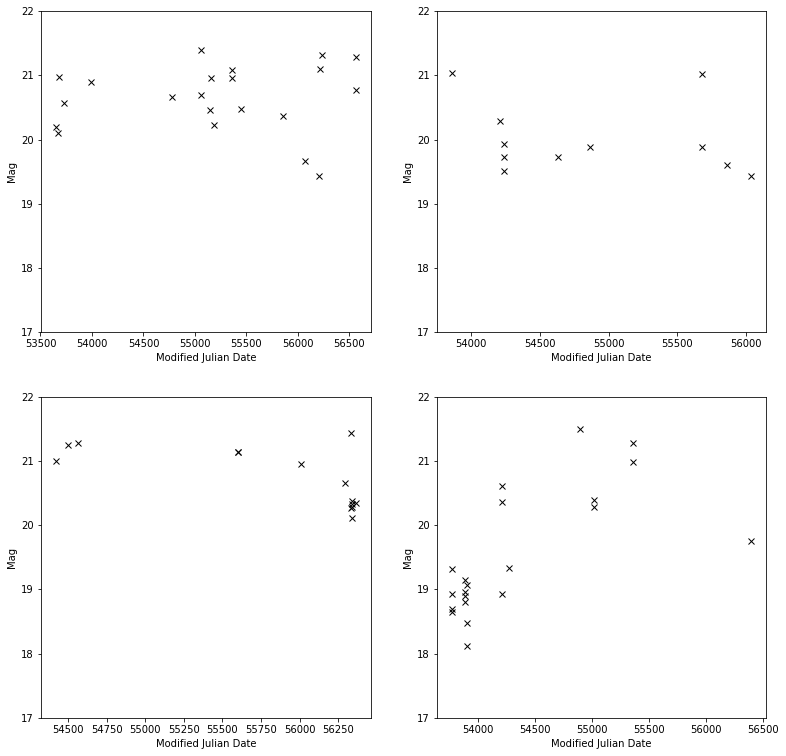

In [295]:
top_classes = ['SN', 'CV', 'AGN', 'Blazar']
top_index = [1, 2, 5, 1]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,13))
ax = [(0,0), (0,1), (1,0), (1,1)]
for i, klass in enumerate(top_classes):
    lc = representative_lightcurve(klass, top_index[i])
    subplot_lightcurve(lc, axes[ax[i]])
plt.savefig('transient_lightcurves.png')